In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv(r"C:\Users\tejas\Downloads\Pregnancy_Risk_Assessment_Monitoring_System__PRAMS_.csv")

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')

DATA CLEANING

In [45]:
data.head()

,year,source,question,prevalence_percent,lower_95percent_confidence_interval,upper_95percent_confidence_interval
0,2016,0,3,8.0,6.6,9.7
1,2016,0,11,6.9,5.6,8.5
2,2016,0,12,9.2,7.7,11.0
3,2016,0,10,24.3,22.0,26.8
4,2016,0,4,2.7,1.9,3.7


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 98 non-null     int64  
 1   source                               98 non-null     int32  
 2   question                             98 non-null     int32  
 3   prevalence_percent                   98 non-null     float64
 4   lower_95percent_confidence_interval  98 non-null     float64
 5   upper_95percent_confidence_interval  98 non-null     float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 4.0 KB


In [47]:
data.describe()

,year,source,question,prevalence_percent,lower_95percent_confidence_interval,upper_95percent_confidence_interval
count,98.000000,98.0,98.000000,98.000000,98.000000,98.000000
mean,2019.000000,0.0,6.500000,26.640816,24.709184,28.752041
std,2.010283,0.0,4.051855,29.057106,28.643472,29.251488
min,2016.000000,0.0,0.000000,1.700000,1.100000,2.600000
25%,2017.000000,0.0,3.000000,7.275000,5.775000,9.125000
50%,2019.000000,0.0,6.500000,12.500000,10.550000,14.750000
75%,2021.000000,0.0,10.000000,31.450000,28.600000,34.475000
max,2022.000000,0.0,13.000000,94.300000,92.700000,95.600000


In [48]:
data.isnull().sum()

year                                   0
source                                 0
question                               0
prevalence_percent                     0
lower_95percent_confidence_interval    0
upper_95percent_confidence_interval    0
dtype: int64

In [31]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


In [39]:
# Drop rows with missing values
data.dropna(inplace=True)

DATA VISUALIZATION

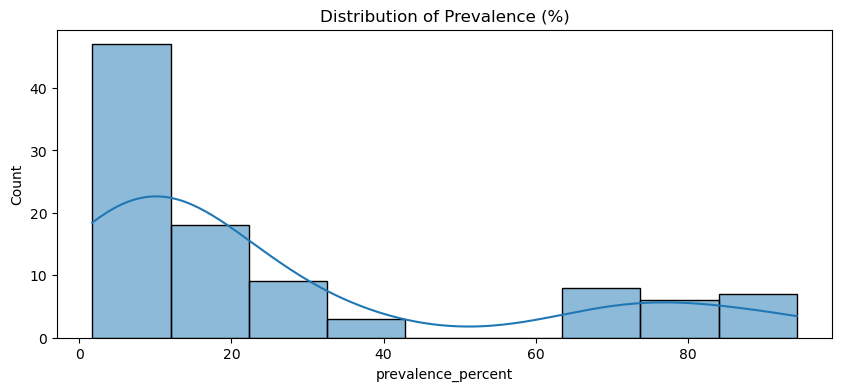

In [40]:
plt.figure(figsize=(10, 4))
sns.histplot(data['prevalence_percent'], kde=True)
plt.title("Distribution of Prevalence (%)")
plt.show()



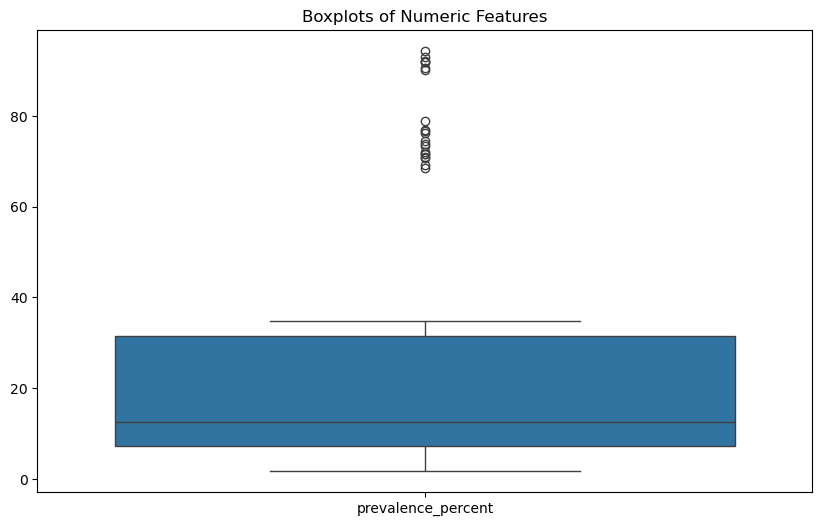

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['prevalence_percent']])
plt.title("Boxplots of Numeric Features")
plt.show()

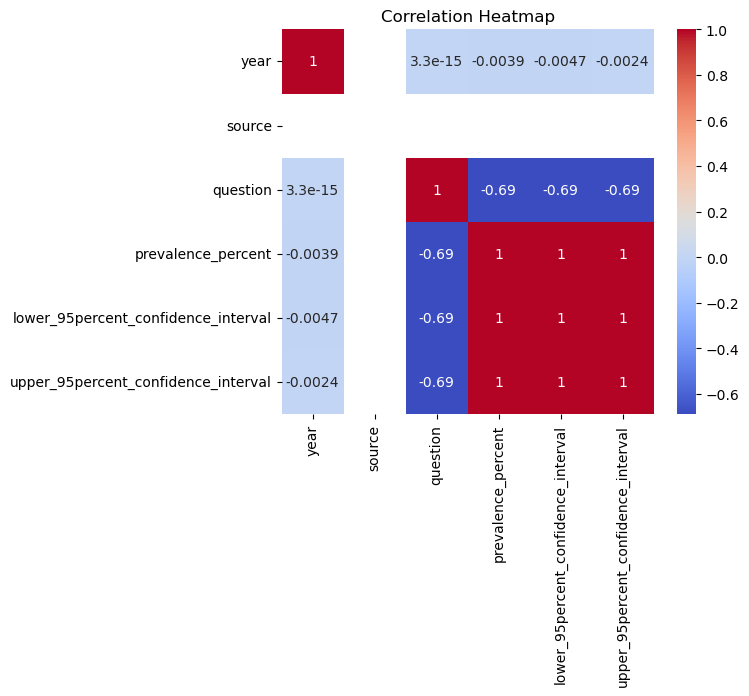

In [43]:
plt.figure(figsize=(6, 5))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

FEATURE SELECTION

In [34]:
label_encoders = {}
for col in ['source', 'question']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

available_features = []
for feature in ['year', 'source', 'question', 'lower_95_confidence_interval', 'upper_95_confidence_interval']:
    if feature in data.columns:
        available_features.append(feature)
    else:
        print(f"Warning: Column '{feature}' not found in the DataFrame")

X = data[available_features]
y = data['prevalence_percent']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

MODEL TRAINING(In this two models were trained)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

MODEL EVALUATION

In [36]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print("  R2 Score:", round(r2_score(y_true, y_pred), 3))
    print("  RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))
    print()

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

Linear Regression Performance:
  R2 Score: 0.334
  RMSE: 23.903

Random Forest Performance:
  R2 Score: 0.997
  RMSE: 1.702



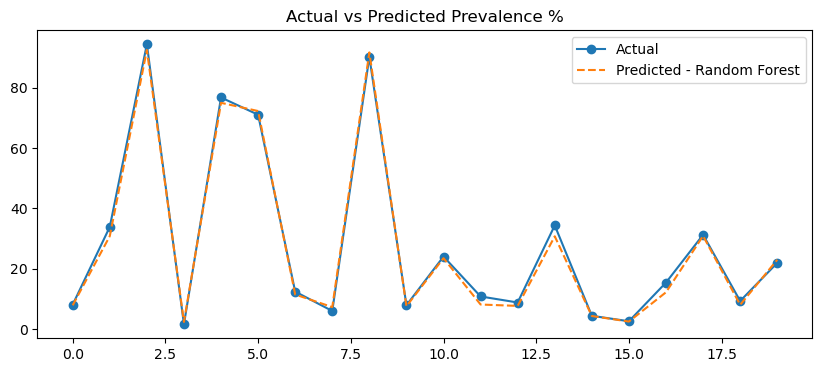

In [38]:
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_rf, label='Predicted - Random Forest', linestyle='--')
plt.title("Actual vs Predicted Prevalence %")
plt.legend()
plt.show()